In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
data = fetch_openml(name='credit-g', version=1, as_frame=True)
df = data.frame
print(df.head())



  checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/dep/mar          none  ...

In [ ]:
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


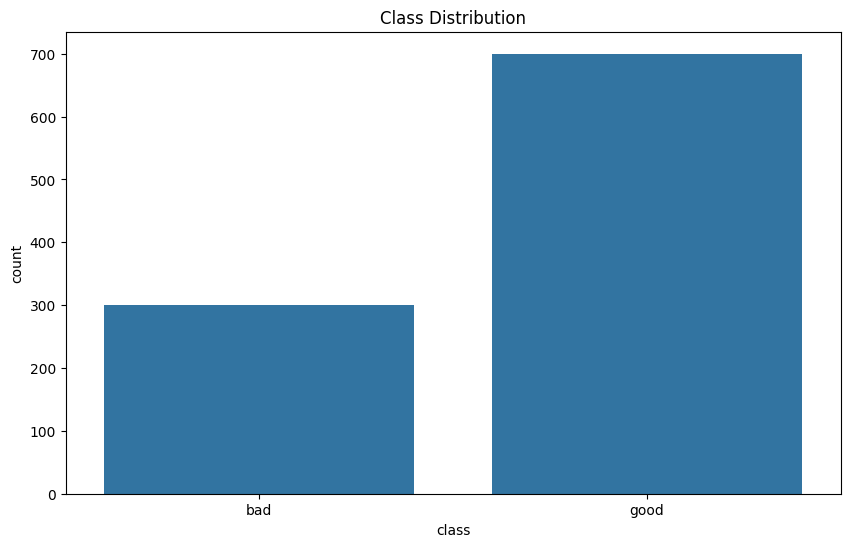

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Step 0: Check actual column names
print("Column names in dataset:", df.columns)

# OPTIONAL: Rename the actual column if it's not 'class'
# For example, if it's 'Class' or something else:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)  # normalize column names
if 'class' not in df.columns:
    raise KeyError("Target column 'class' not found. Check column names above.")

# Step 1: Drop rows where target is missing
df = df.dropna(subset=['class'])

# Step 2: Convert labels to numeric
df['class'] = df['class'].map({1: 1, 2: 0, 'good': 1, 'bad': 0})

# Step 3: Drop unmapped values
df = df.dropna(subset=['class'])

# Step 4: Features and labels
X = df.drop('class', axis=1)
y = df['class']

# Step 5: One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 6: Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Step 7: Oversample
sm = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Step 8: Check result
print("Original training size:", X_train.shape)
print("Resampled training size:", X_train_resampled.shape)


Column names in dataset: Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')
Original training size: (700, 48)
Resampled training size: (972, 48)


In [ ]:
from sklearn.linear_model import LogisticRegression
mlog = LogisticRegression()
mlog.fit(X_train_resampled, y_train_resampled)
accuracy_score(y_test, mlog.predict(X_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7366666666666667